In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Lire le CSV existant 
# data = pd.read_csv('maison.csv') qd j'aurai un CSV

In [4]:
# Paramètres
np.random.seed(42)  # Pour faire des parametre aléatoire

In [19]:

# Générer des données fictives
num_samples = 1000
surface = np.random.uniform(30, 140, num_samples)  # Plage de surface entre 30 et 140 m^2
nombre_de_chambres = np.random.randint(1, 6, num_samples)  # Jusqu'à 5 chambres
prix = 5000 * surface + 30000 * nombre_de_chambres + np.random.normal(0, 10000, num_samples)  # Plafonné à un prix de 1 000 000 euros


In [20]:
# Créer un dataframe
data = pd.DataFrame({'surface': surface, 'nombre_de_chambres': nombre_de_chambres, 'prix': prix})

In [21]:
# Afficher les premières lignes du dataframe
print(data.head())

      surface  nombre_de_chambres           prix
0   93.612824                   5  641100.507202
1   46.165898                   4  336035.048042
2  119.223615                   2  668710.405861
3   99.955018                   2  571239.497644
4   72.698228                   2  413757.349990


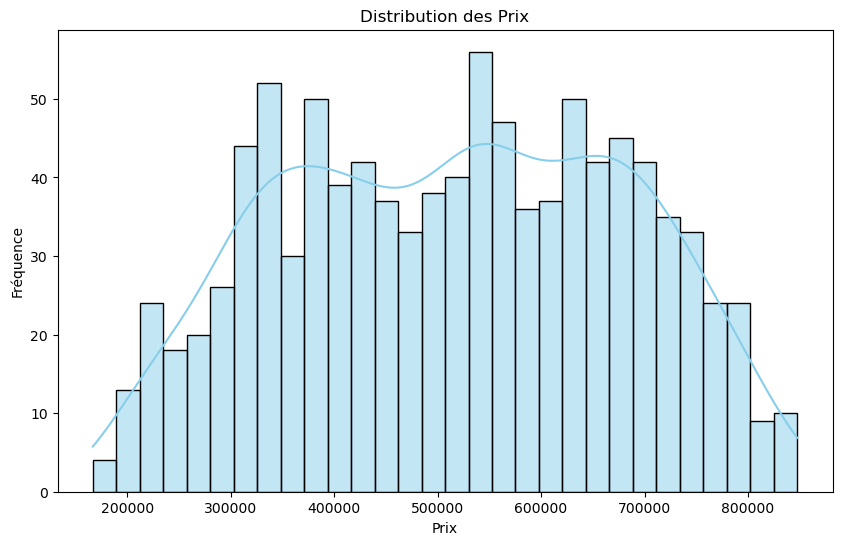

In [22]:
# Distribution des prix
plt.figure(figsize=(10, 6))
sns.histplot(data['prix'], bins=30, kde=True, color='skyblue')
plt.title('Distribution des Prix')
plt.xlabel('Prix')
plt.ylabel('Fréquence')
plt.show()


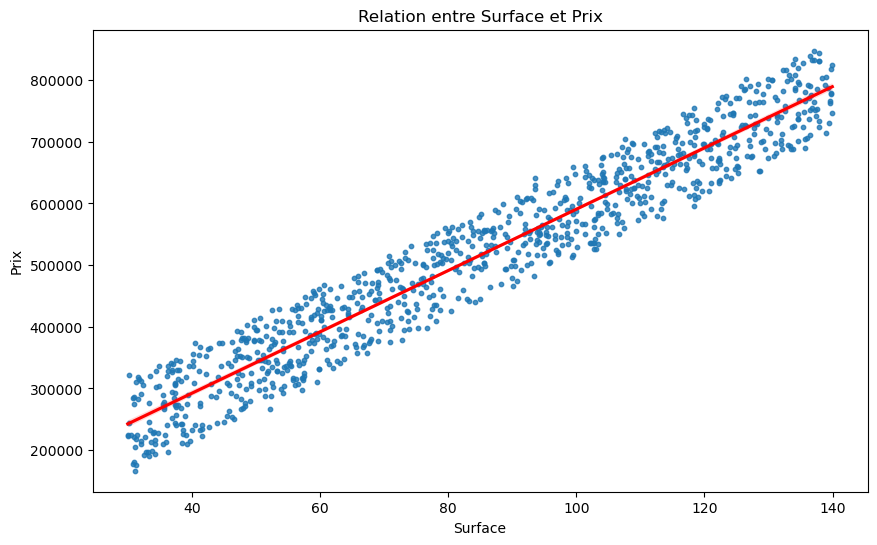

In [23]:
# Relation entre la surface et le prix avec une régression linéaire
plt.figure(figsize=(10, 6))
sns.regplot(x='surface', y='prix', data=data, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Relation entre Surface et Prix')
plt.xlabel('Surface')
plt.ylabel('Prix')
plt.show()

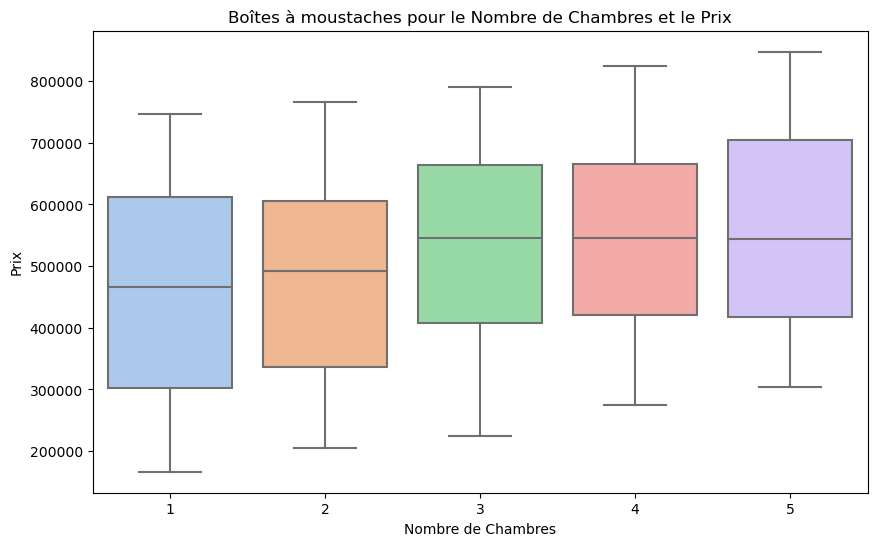

In [24]:
# Boîtes à moustaches pour le nombre de chambres et le prix
plt.figure(figsize=(10, 6))
sns.boxplot(x='nombre_de_chambres', y='prix', data=data, palette='pastel')
plt.title('Boîtes à moustaches pour le Nombre de Chambres et le Prix')
plt.xlabel('Nombre de Chambres')
plt.ylabel('Prix')
plt.show()

In [25]:
# Nuage de points interactif
fig = px.scatter(data, x='surface', y='prix', color='nombre_de_chambres', size='prix',
                 hover_name='nombre_de_chambres', title='Nuage de Points Interactif', labels={'prix': 'Prix'})
fig.show()


In [26]:
# Préparation des données
X = data[['surface', 'nombre_de_chambres']]
y = data['prix']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Préparation des données
X = data[['surface', 'nombre_de_chambres']]
y = data['prix']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Construction et entraînement du modèle
# Initialiser le modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)


LinearRegression()

In [29]:
# Faire des prédictions sur les données de test
y_pred = model.predict(X_test)

# Calculer les métriques d'évaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Afficher les résultats
print(f'Mean Squared Error : {mse}')
print(f'R-squared : {r2}')


Mean Squared Error : 89769383.22361511
R-squared : 0.9965960774992416


In [30]:
# Afficher l'interception (b0) et les coefficients (b1, b2, ...)
interception = model.intercept_
coefficients = model.coef_

print(f'Interception (b0) : {interception}')
print(f'Coefficients (b1, b2, ...) : {coefficients}')

Interception (b0) : -1336.4579071920016
Coefficients (b1, b2, ...) : [ 5001.56416251 30195.09990107]


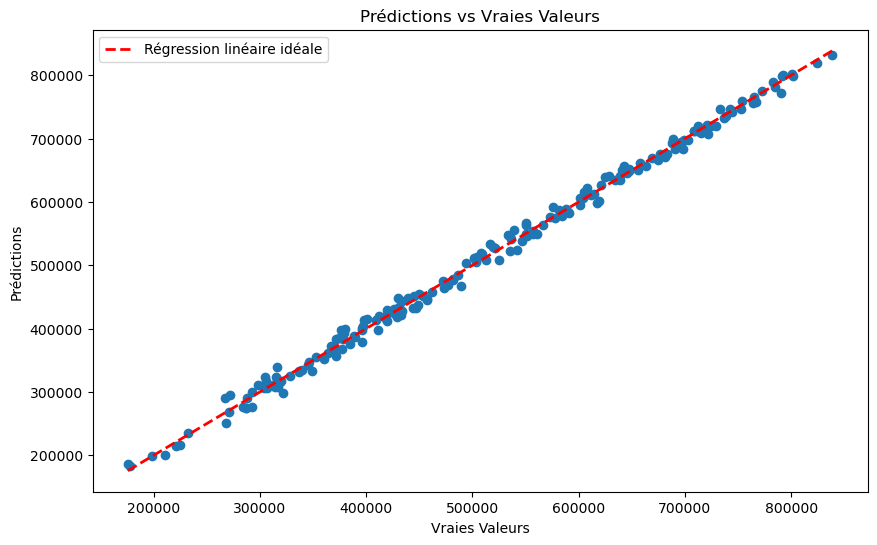

In [31]:
# Visualisation des prédictions par rapport aux vraies valeurs
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Régression linéaire idéale')
plt.title('Prédictions vs Vraies Valeurs')
plt.xlabel('Vraies Valeurs')
plt.ylabel('Prédictions')
plt.legend()
plt.show()


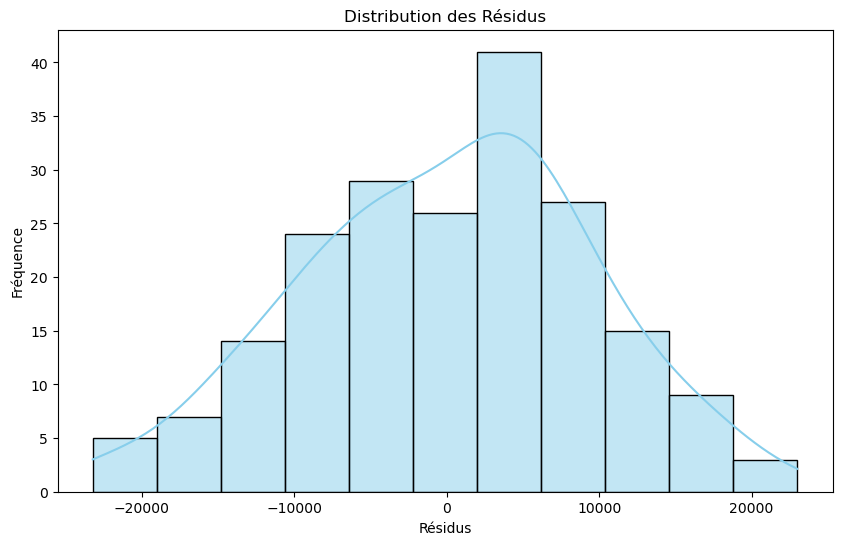

In [32]:
# Calcul des résidus (différences entre les vraies valeurs et les prédictions)
residus = y_test - y_pred

# Visualisation des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residus, kde=True, color='skyblue')
plt.title('Distribution des Résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()
